# Breast Classification Project

## 1. Data Acquisition and Exploration:

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
import keras



In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()


In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.shape

(569, 31)

In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


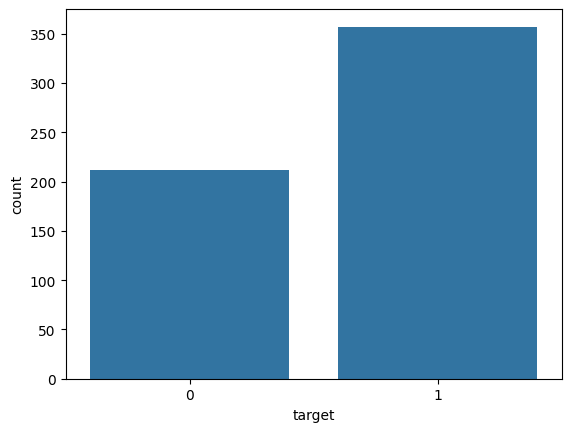

In [7]:
sns.countplot(x='target', data=df)
plt.show()
## 0 -> danger . 1-> not danger

In [11]:
df.groupby('target').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


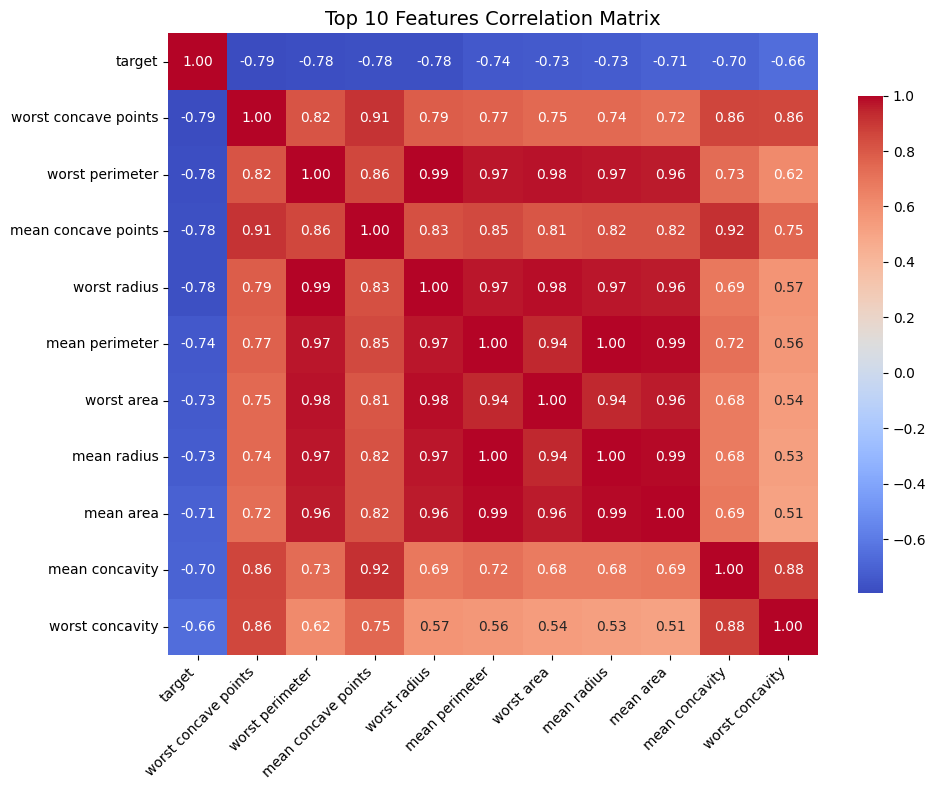

In [21]:
def plot_correlation(df) :
  correlation_matrix = df.corr()
  top_features = correlation_matrix['target'].abs().sort_values(ascending=False).head(11).index  # includes 'target' itself
  top_correlation_matrix = correlation_matrix.loc[top_features, top_features]
  plt.figure(figsize=(10, 8))
  sns.heatmap(top_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, cbar_kws={'shrink': 0.8})
  plt.xticks(fontsize=10, rotation=45, ha='right')
  plt.yticks(fontsize=10)
  plt.title("Top 10 Features Correlation Matrix", fontsize=14)
  plt.tight_layout()
  plt.show()
plot_correlation(df)


## 2. Data Preprocessing:

In [19]:
correlation_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features
df_selected = df.drop(to_drop, axis=1)

print("Original DataFrame shape:", df.shape)
print("New DataFrame shape:", df_selected.shape)


Original DataFrame shape: (569, 31)
New DataFrame shape: (569, 24)


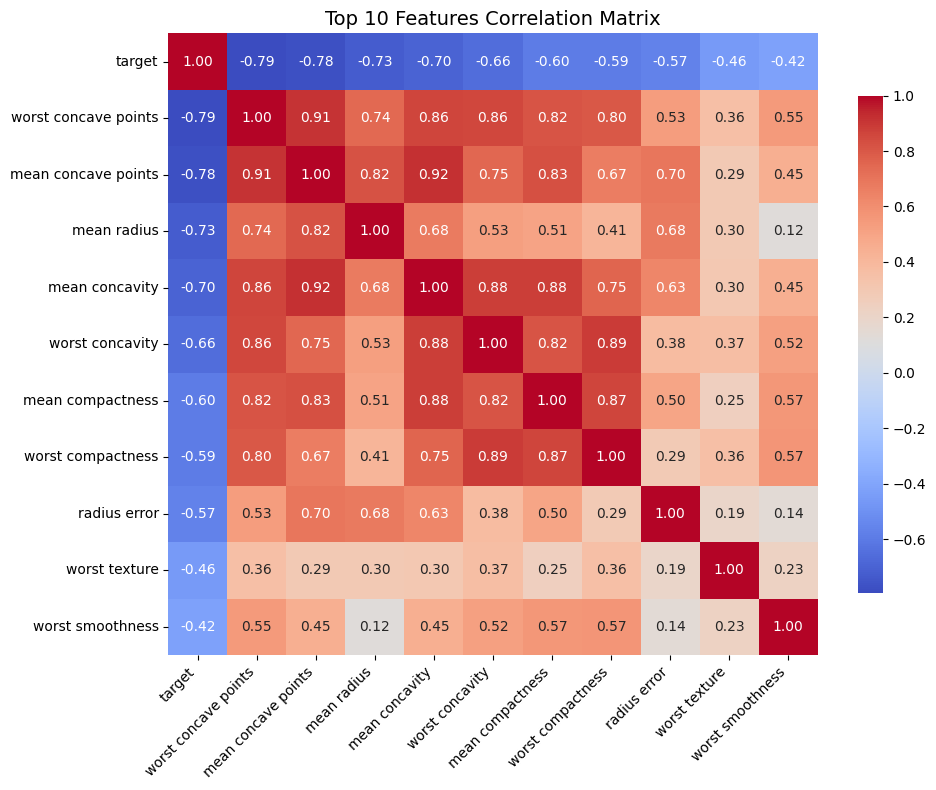

In [22]:
plot_correlation(df_selected)

In [24]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean smoothness          569 non-null    float64
 3   mean compactness         569 non-null    float64
 4   mean concavity           569 non-null    float64
 5   mean concave points      569 non-null    float64
 6   mean symmetry            569 non-null    float64
 7   mean fractal dimension   569 non-null    float64
 8   radius error             569 non-null    float64
 9   texture error            569 non-null    float64
 10  smoothness error         569 non-null    float64
 11  compactness error        569 non-null    float64
 12  concavity error          569 non-null    float64
 13  concave points error     569 non-null    float64
 14  symmetry error           5

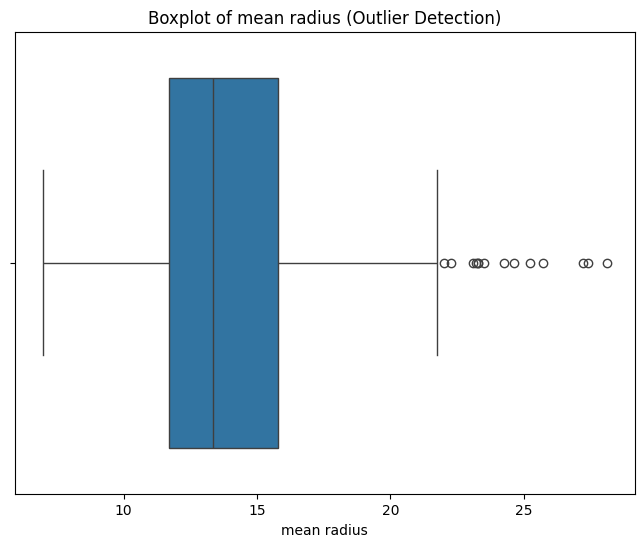

Outliers in mean radius: 2.46%


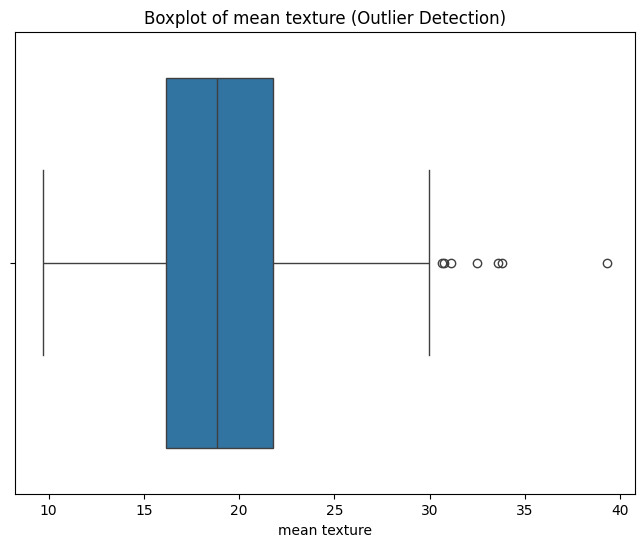

Outliers in mean texture: 1.23%


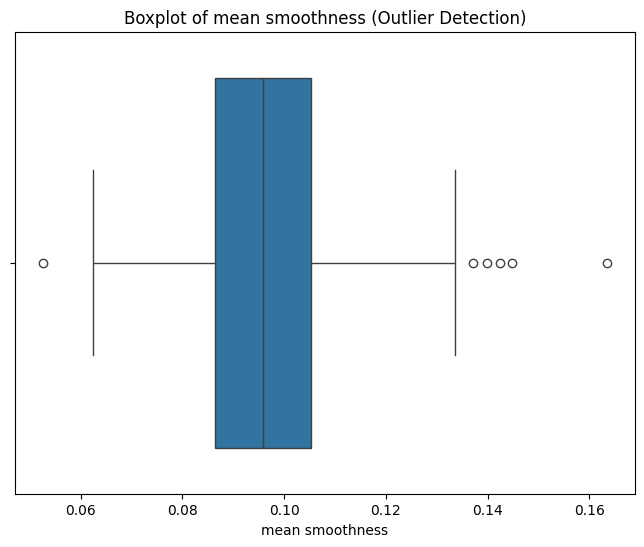

Outliers in mean smoothness: 1.05%


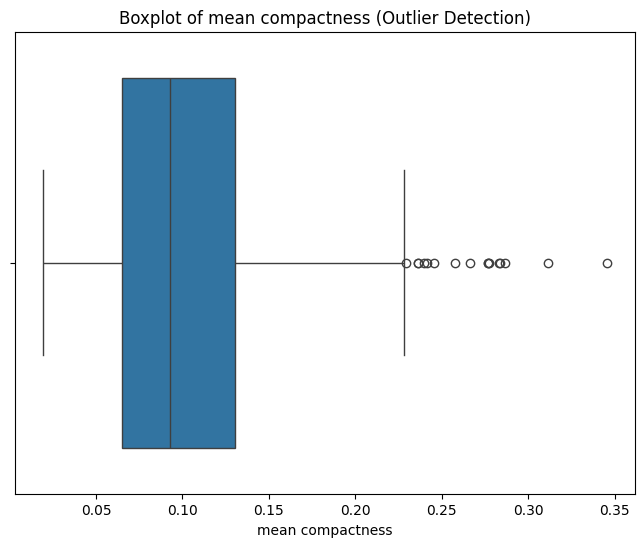

Outliers in mean compactness: 2.81%


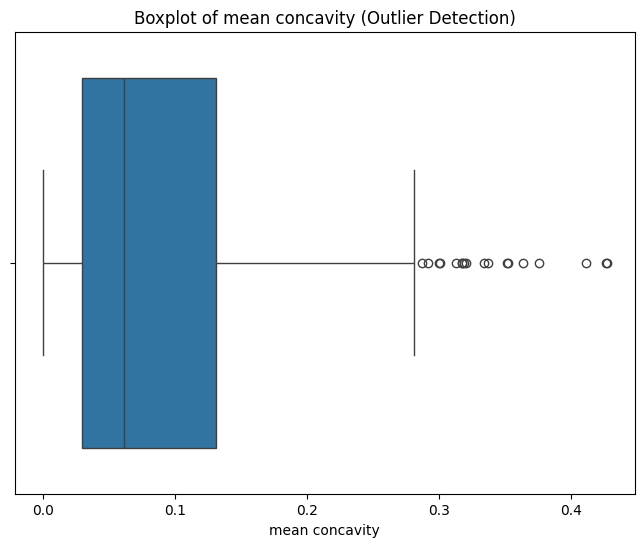

Outliers in mean concavity: 3.16%


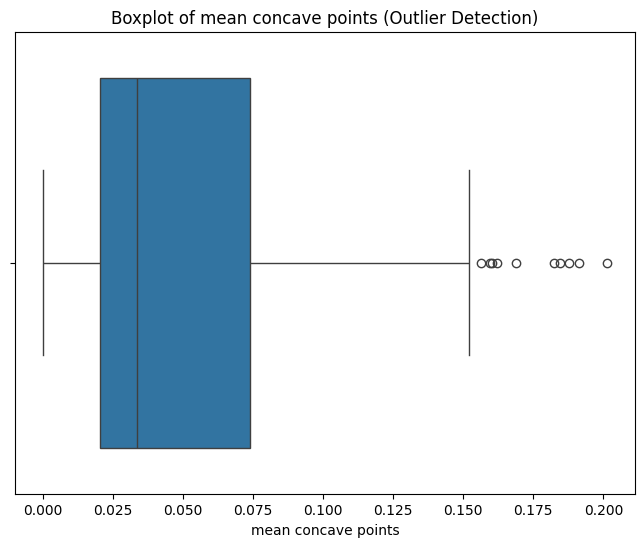

Outliers in mean concave points: 1.76%


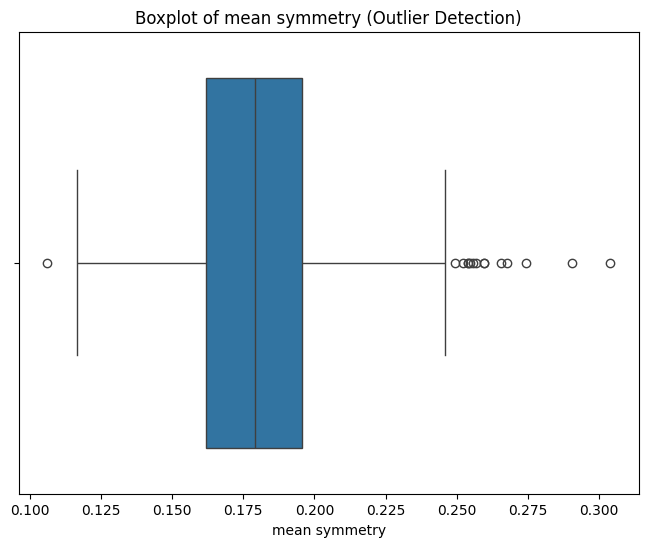

Outliers in mean symmetry: 2.64%


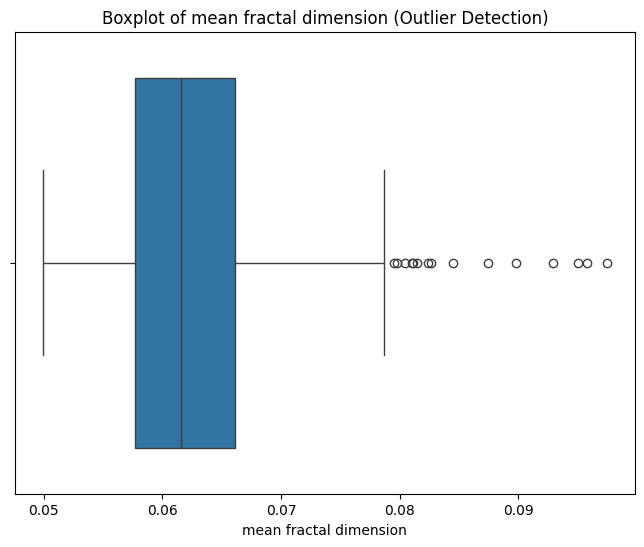

Outliers in mean fractal dimension: 2.64%


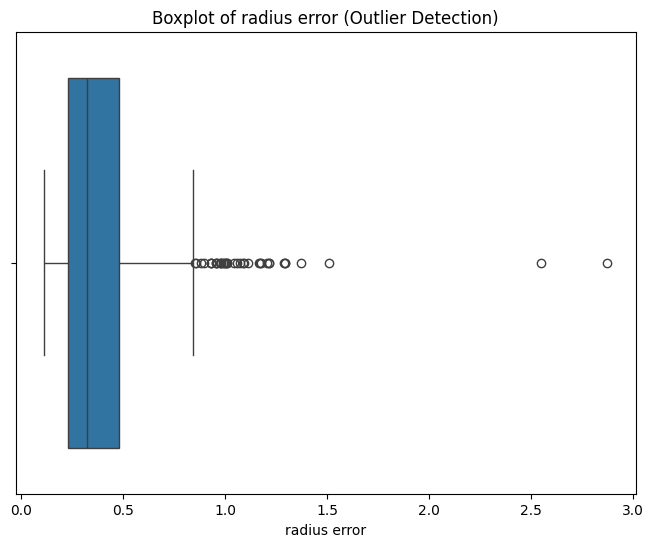

Outliers in radius error: 6.68%


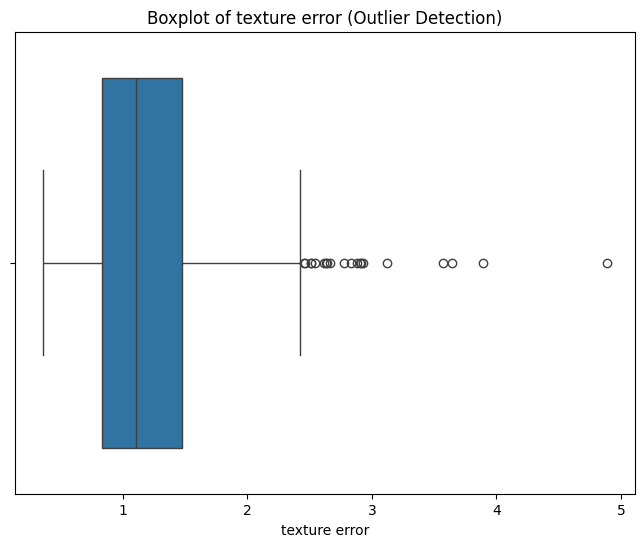

Outliers in texture error: 3.51%


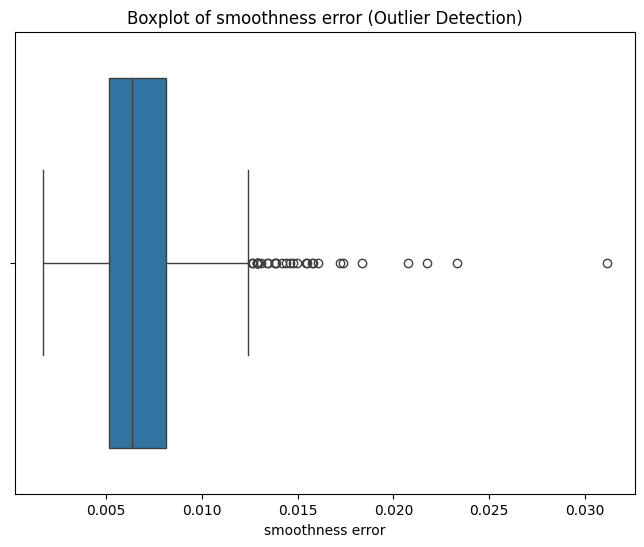

Outliers in smoothness error: 5.27%


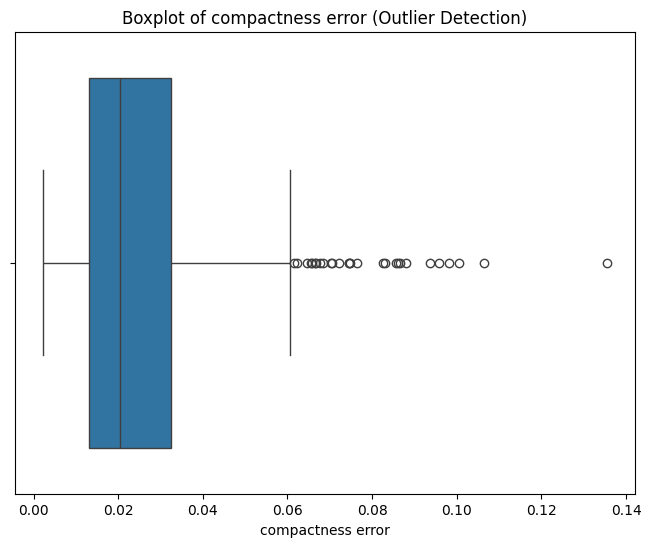

Outliers in compactness error: 4.92%


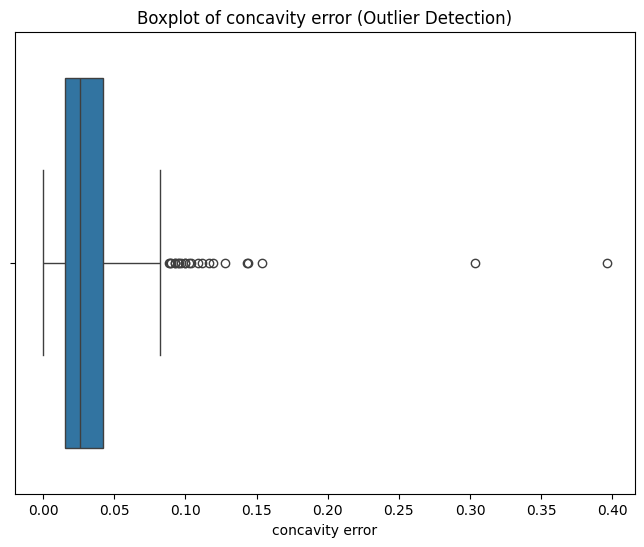

Outliers in concavity error: 3.87%


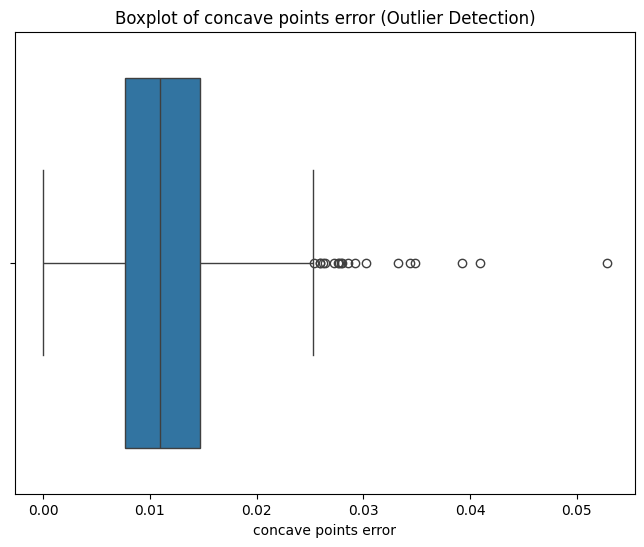

Outliers in concave points error: 3.34%


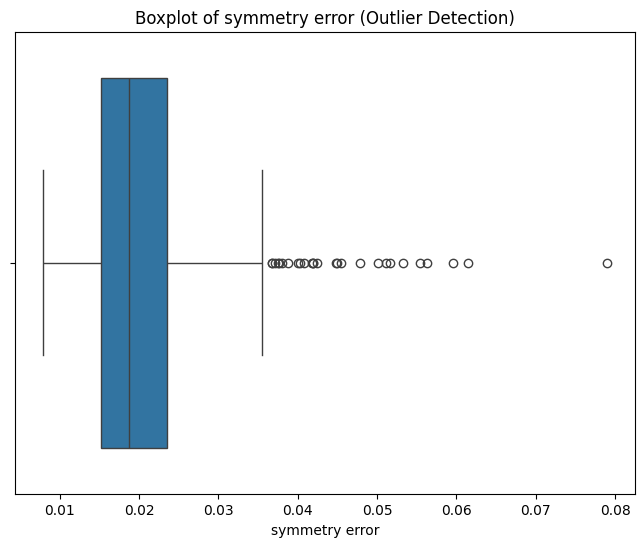

Outliers in symmetry error: 4.75%


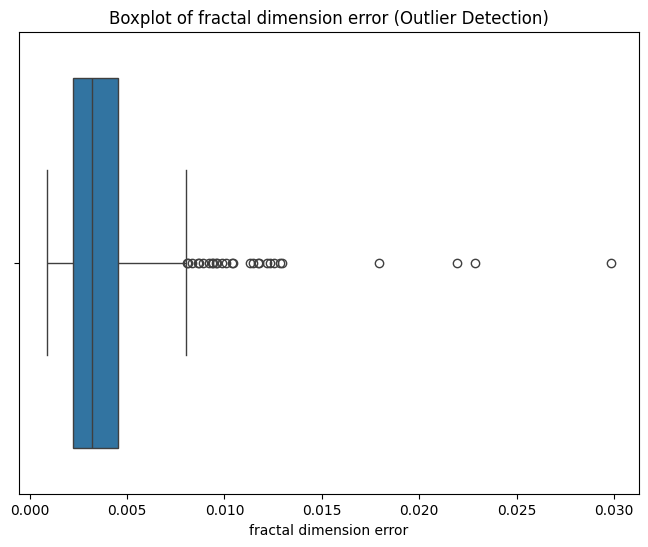

Outliers in fractal dimension error: 4.92%


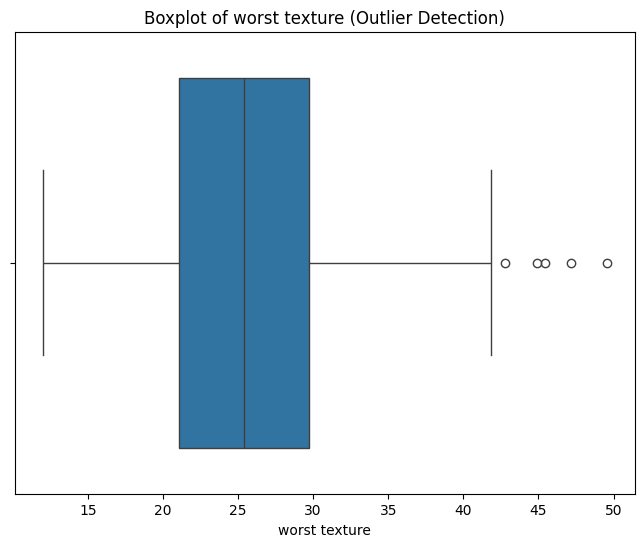

Outliers in worst texture: 0.88%


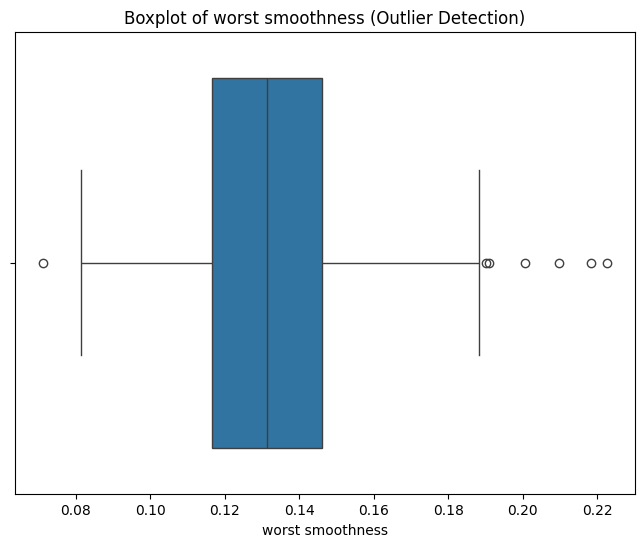

Outliers in worst smoothness: 1.23%


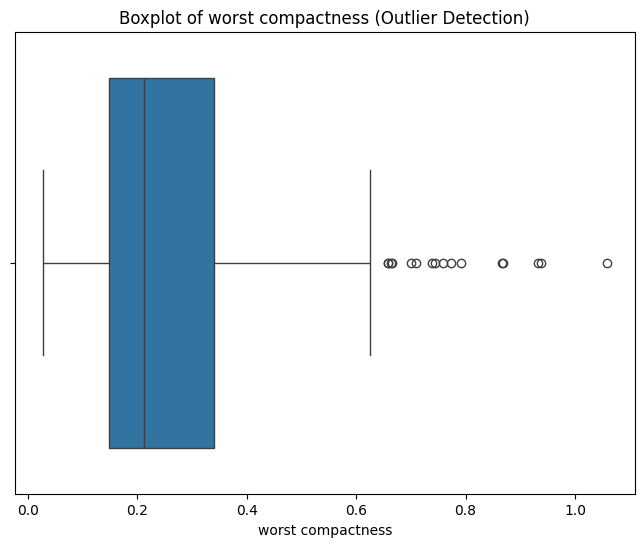

Outliers in worst compactness: 2.81%


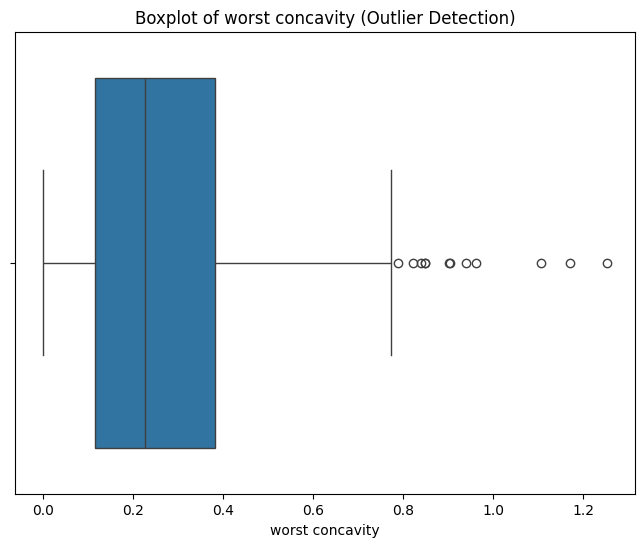

Outliers in worst concavity: 2.11%


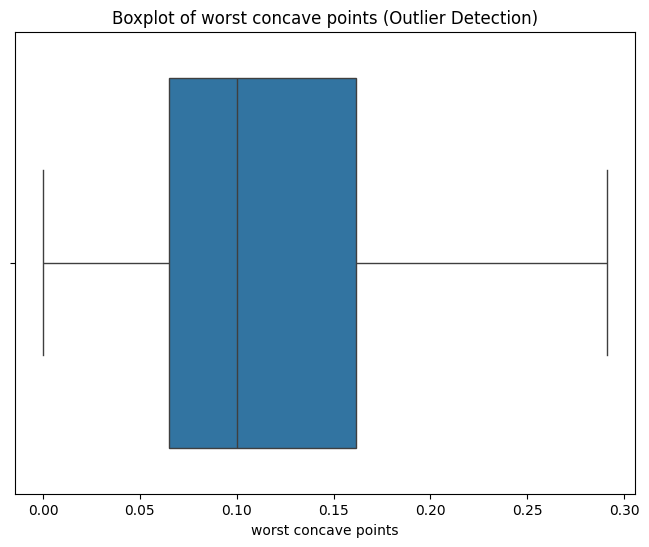

Outliers in worst concave points: 0.00%


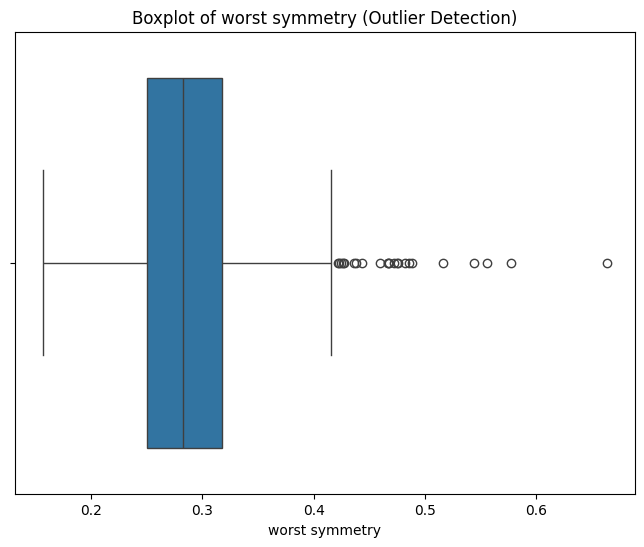

Outliers in worst symmetry: 4.04%


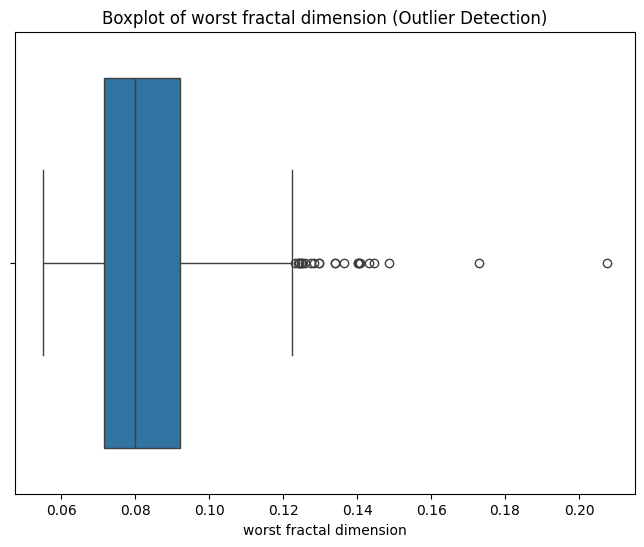

Outliers in worst fractal dimension: 4.22%


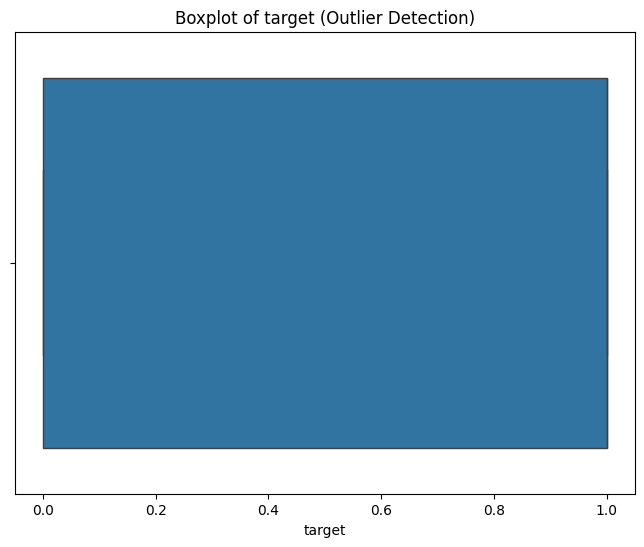

Outliers in target: 0.00%


In [26]:
def plot_outliers(df, column):
    """
    Plots a boxplot to identify outliers in the given column of the DataFrame and
    returns the percentage of outliers.

    Args:
        df: The pandas DataFrame containing the data.
        column: The name of the column to plot.

    Returns:
        outlier_percentage: The percentage of outliers in the column.
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define outliers as points outside 1.5*IQR from Q1 and Q3
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Calculate the percentage of outliers
    outlier_percentage = len(outliers) / len(df) * 100

    # Plot the boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column} (Outlier Detection)")
    plt.xlabel(column)
    plt.show()

    return outlier_percentage

outlier_percentages = {}
for column in df_selected.columns:
    percentage = plot_outliers(df_selected, column)
    outlier_percentages[column] = percentage
    print(f"Outliers in {column}: {percentage:.2f}%")



## 3. Model Building

In [28]:
def seperate(df) :
  x = df.drop(columns='target',axis = 1)
  y = df['target']
  return [x,y]
X,Y = seperate(df_selected)


In [68]:
X[:10]

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,...,concave points error,symmetry error,fractal dimension error,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,...,0.01587,0.03003,0.006193,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,...,0.01340,0.01389,0.003532,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,...,0.02058,0.02250,0.004571,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,...,0.01867,0.05963,0.009208,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,...,0.01885,0.01756,0.005115,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,...,0.01137,0.02165,0.005082,23.75,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,...,0.01039,0.01369,0.002179,27.66,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,...,0.01448,0.01486,0.005412,28.14,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,...,0.01226,0.02143,0.003749,30.73,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,...,0.01432,0.01789,0.010080,40.68,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [69]:
Y[:10]

,target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [41]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2 ,random_state = 11)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(455, 23) (114, 23) (455,) (114,)


In [49]:
## preferable number of neurons to be in the for of 2^i
## preferable that layers distribution to be  :
KerasModel = keras.models.Sequential([
                # keras.layers.Input(shape=(17)), automatic detection
            keras.layers.Dense(8,  activation = 'tanh'),
            # keras.layers.Dropout(0.1),
            keras.layers.Dense(128, activation = 'sigmoid'),
            # keras.layers.Dropout(0.3),
            keras.layers.Dense(64, activation = 'tanh'),
            keras.layers.Dense(32, activation = 'tanh'),
            # keras.layers.Dropout(0.2),
            keras.layers.Dense(1, activation = 'sigmoid')
            ])

In [50]:
## the job of an optimizer like gradient descent is to minimize the loss function
## binary cross entropy a loss function to penalize bad predictions using log functions

KerasModel.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy']) # matrix

In [51]:
history = KerasModel.fit(x_train ,y_train,
                         validation_split  = 0.2 ,
                         epochs= 50,
                         batch_size=1,
                         verbose=1,
                         callbacks=[tf.keras.callbacks.EarlyStopping(
                                            patience=10,
                                            monitor='val_accuracy',#"val_loss",
                                            restore_best_weights=True)])


Epoch 1/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5855 - loss: 0.7148 - val_accuracy: 0.5934 - val_loss: 0.6739
Epoch 2/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6482 - loss: 0.6680 - val_accuracy: 0.5934 - val_loss: 0.6887
Epoch 3/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6161 - loss: 0.6767 - val_accuracy: 0.5934 - val_loss: 0.6876
Epoch 4/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6875 - loss: 0.6264 - val_accuracy: 0.6044 - val_loss: 0.6634
Epoch 5/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6456 - loss: 0.6533 - val_accuracy: 0.5934 - val_loss: 0.7216
Epoch 6/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6910 - loss: 0.5929 - val_accuracy: 0.7692 - val_loss: 0.5647
Epoch 7/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7297 - loss: 0.5561 - val_accuracy: 0.7143 - val_loss: 0.5232
Epoch 8/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7880 - loss: 0.4323 - val_accuracy: 0.

In [52]:
print(KerasModel.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (1, 8)                      │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (1, 128)                    │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (1, 64)                     │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (1, 32)                     │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (1, 1)                      │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,141 (137.27 KB)

 Trainable params: 11,713 (45.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,428 (91.52 KB)

None


In [54]:
KerasModel.save('KerasModel.model.h5')

## Evaluation

In [56]:
NewKerasModel = keras.models.load_model('KerasModel.model.h5')

In [57]:
y_pred = NewKerasModel.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [59]:
len(y_pred)

114

In [60]:
y_pred[:10]

array([[0.01247979],
       [0.00696902],
       [0.01681568],
       [0.006945  ],
       [0.00829702],
       [0.89017385],
       [0.03453017],
       [0.9009714 ],
       [0.922277  ],
       [0.88260496]], dtype=float32)

In [61]:
print('Prediction items are {}'.format(y_pred[:5]))


Prediction items are [[0.01247979]
 [0.00696902]
 [0.01681568]
 [0.006945  ]
 [0.00829702]]


In [62]:
print('True items are {}'.format(y_test[:5]))


True items are 198    0
162    0
70     0
393    0
56     0
Name: target, dtype: int64


In [63]:
ModelLoss, ModelAccuracy = NewKerasModel.evaluate(x_test, y_test)
print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy ))


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9645 - loss: 0.1724  
Model Loss is 0.14824698865413666
Model Accuracy is 0.9736841917037964


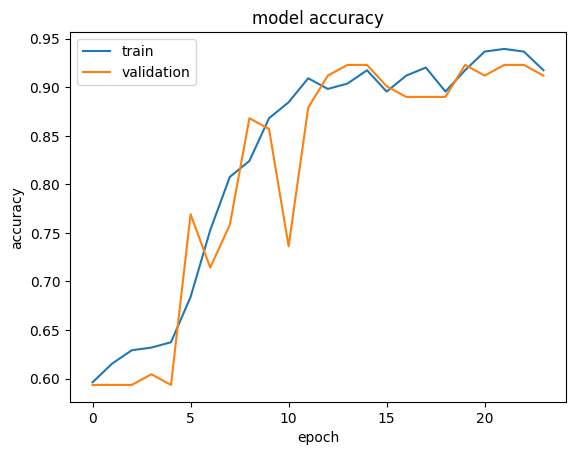

In [64]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


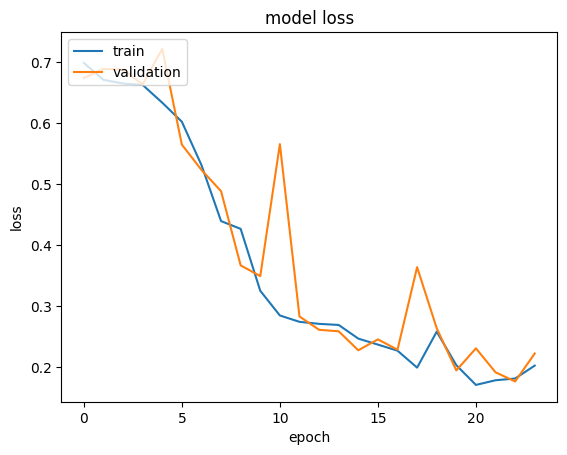

In [65]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [66]:
y_pred = [np.round(i[0]) for i in y_pred]

Confusion Matrix is : 
 [[36  2]
 [ 1 75]]


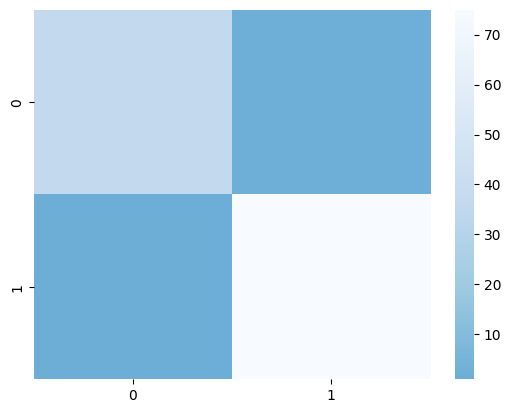

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)
sns.heatmap(CM, center = True,cmap='Blues_r')
plt.show()
